In [ ]:
%load_ext autoreload
%autoreload 2
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from tqdm import tqdm
import pandas as pd
import sys
from typing import List
import numpy as np
import joblib
from mprompt.modules.fmri_module import SAVE_DIR_FMRI
import imodelsx.util
from mprompt.modules.emb_diff_module import EmbDiffModule
import scipy.stats
from mprompt.methods.m4_evaluate import D5_Validator
import torch.cuda
num_top_test_ngrams = 75
r = (pd.read_pickle('../results/results_fmri.pkl')
    .sort_values(by=['top_score_synthetic'], ascending=False))

In [ ]:
columns = {
    # fmri stuff
    'subject': 'Subject',
    'module_num': 'Voxel',
    'roi_func': 'ROI (functional)',
    'roi_anat': 'ROI (anatomical)',
    'fmri_test_corr': 'Correlation (test)',
    
    # scores
    'top_score_synthetic': 'Synthetic data score',
    'frac_top_ngrams_module_correct': 'Fraction of matching ngrams (module, top-75)',
    # 'frac_top_ngrams_test_correct': 'Fraction of matching ngrams (test, top-75)',
            
    # explanation
    'top_explanation_init_strs': 'Explanation',
        
    # ngrams matching the explanation (used 75 ngrams)
    'top_ngrams_module_correct': 'Matching ngrams (module, top-75)',
    # 'top_ngrams_test_correct': 'Matching ngrams (test, top-75)',

    # all ngrams
    'top_ngrams_module_25': 'Top ngrams (module, top-25)',
    # 'top_ngrams_test_25': 'Top ngrams (test, top-25)',

    # alternative explanations
    'explanation_init_strs': 'Explanation candidates',
}

tab = (
    r
    .sort_values(by=['top_score_synthetic'], ascending=False)
    .filter(columns.keys())
    .rename(columns=columns)
    .round(3)
)
with pd.option_context('display.max_colwidth', -1, 'display.max_rows', 200):
    display(
        tab.head(3)
    )
    tab_join_lists = tab.applymap(lambda x: ' __ '.join(x) if isinstance(x, np.ndarray) or isinstance(x, list) else x)
    tab_join_lists.to_csv('../results/results_fmri.csv', index=False, float_format='%.3f')

# Test predictions example

In [ ]:
dsets = joblib.load(join(SAVE_DIR_FMRI, 'stories', 'running_words.jbl'))
neg_dists_list = []
rankcorr_list = []

row = r.iloc[0]
expl = row['top_explanation_init_strs']
dset = dsets[row['subject']]
strs_list = dset['words']
resp = dset['resp'][:, row['module_num']]
neg_dists = row['neg_dists_expl_test']

rankcorr -0.007


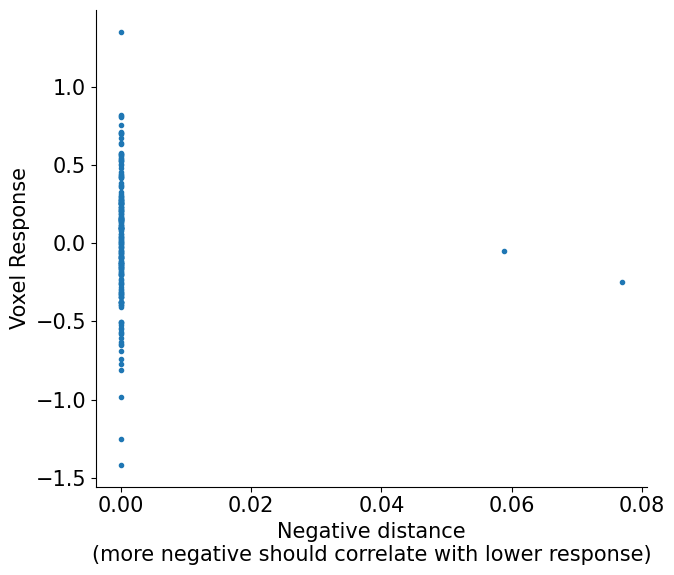

In [12]:
# neg_dists = frac_valid
plt.figure(figsize=(7, 6))
plt.plot(neg_dists[:200], resp[:200], '.')
plt.xlabel('Negative distance\n(more negative should correlate with lower response)')
plt.ylabel('Voxel Response')
res = scipy.stats.spearmanr(neg_dists, resp, nan_policy='omit', alternative='greater')
print('rankcorr', res.statistic.round(3))

# Visualize how things relate to each other

In [ ]:
scores = ['fmri_test_corr', 'top_score_synthetic', 'frac_top_ngrams_module_correct']
sns.pairplot(
    r[scores], kind='reg', diag_kind='kde', plot_kws={'scatter_kws': {'alpha': 0.1}}, markers='.',
    height=3, aspect=2
    )
plt.show()